In [76]:
import pandas as pd
import numpy as np
from pandasql import sqldf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import neural_network
from sklearn.svm import SVR
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,scale
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from scipy.interpolate import splint
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
import matplotlib.pyplot as plt
alt.renderers.enable('notebook')
pysqldf = lambda q: sqldf(q, globals())

ImportError: cannot import name 'spline'

In [52]:
phone = pd.read_csv("/workspace/建模.csv")
phone = phone.drop(['_id'], axis=1)
phone.head()
phoneGroup=phone.groupby("keyword")
iphone=phoneGroup.get_group('iphone')
iphone.head()

,keyword,index,date
0,iphone,17852.0,2019-01-01
1,iphone,20746.0,2019-01-02
2,iphone,19678.0,2019-01-03
3,iphone,20664.0,2019-01-04
4,iphone,19210.0,2019-01-05


In [53]:
iphone['start_time'] = iphone['date'].map(lambda x: int(x[5:7]+x[-2:]))
iphone.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,keyword,index,date,start_time
0,iphone,17852.0,2019-01-01,101
1,iphone,20746.0,2019-01-02,102
2,iphone,19678.0,2019-01-03,103
3,iphone,20664.0,2019-01-04,104
4,iphone,19210.0,2019-01-05,105


In [54]:

iphone = iphone.drop(['keyword','date'], axis=1)
iphone.head()

,index,start_time
0,17852.0,101
1,20746.0,102
2,19678.0,103
3,20664.0,104
4,19210.0,105


In [55]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 2 columns):
index         353 non-null float64
start_time    353 non-null int64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [56]:
# 1. 基于mean和std的标准化
scaler = preprocessing.StandardScaler().fit(iphone)
scaler.transform(iphone)

array([[-1.01305092e+00, -1.63743706e+00],
       [-8.73828652e-01, -1.63445112e+00],
       [-9.25207154e-01, -1.63146518e+00],
       [-8.77773443e-01, -1.62847924e+00],
       [-9.47721328e-01, -1.62549330e+00],
       [-9.93134536e-01, -1.62250736e+00],
       [-9.37715029e-01, -1.61952142e+00],
       [-9.36031276e-01, -1.61653548e+00],
       [-9.68166893e-01, -1.61354954e+00],
       [-5.69983506e-01, -1.61056360e+00],
       [-5.03258804e-01, -1.60757766e+00],
       [-7.03673446e-01, -1.60459172e+00],
       [-8.15955677e-01, -1.60160578e+00],
       [-7.81943879e-01, -1.59861984e+00],
       [-8.73876759e-01, -1.59563390e+00],
       [-7.93970681e-01, -1.59264796e+00],
       [-8.38950924e-01, -1.58966202e+00],
       [-8.25817655e-01, -1.58667608e+00],
       [-9.01297870e-01, -1.58369014e+00],
       [-8.68825502e-01, -1.58070420e+00],
       [-7.70109505e-01, -1.57771826e+00],
       [-8.46648078e-01, -1.57473232e+00],
       [ 3.02982760e-02, -1.57174638e+00],
       [ 1.

In [57]:
# 2. 将每个特征值归一化到一个固定范围
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(iphone)
scaler.transform(iphone)

array([[0.00000000e+00, 0.00000000e+00],
       [7.91445605e-03, 8.94454383e-04],
       [4.99371000e-03, 1.78890877e-03],
       [7.69020401e-03, 2.68336315e-03],
       [3.71383252e-03, 3.57781753e-03],
       [1.13219931e-03, 4.47227191e-03],
       [4.28266696e-03, 5.36672630e-03],
       [4.37838429e-03, 6.26118068e-03],
       [2.55155062e-03, 7.15563506e-03],
       [2.51873325e-02, 8.05008945e-03],
       [2.89804737e-02, 8.94454383e-03],
       [1.75873763e-02, 9.83899821e-03],
       [1.12043975e-02, 1.07334526e-02],
       [1.31378877e-02, 1.16279070e-02],
       [7.91172127e-03, 1.25223614e-02],
       [1.24541924e-02, 1.34168157e-02],
       [9.89717224e-03, 1.43112701e-02],
       [1.06437674e-02, 1.52057245e-02],
       [6.35289613e-03, 1.61001789e-02],
       [8.19887327e-03, 1.69946333e-02],
       [1.38106438e-02, 1.78890877e-02],
       [9.45960729e-03, 1.87835420e-02],
       [5.93119291e-02, 1.96779964e-02],
       [6.77706066e-02, 2.05724508e-02],
       [6.523819

In [63]:
X =np.asarray(iphone.get('start_time')).reshape(-1,1) 


[[ 101]
 [ 102]
 [ 103]
 [ 104]
 [ 105]
 [ 106]
 [ 107]
 [ 108]
 [ 109]
 [ 110]
 [ 111]
 [ 112]
 [ 113]
 [ 114]
 [ 115]
 [ 116]
 [ 117]
 [ 118]
 [ 119]
 [ 120]
 [ 121]
 [ 122]
 [ 123]
 [ 124]
 [ 125]
 [ 126]
 [ 127]
 [ 128]
 [ 129]
 [ 130]
 [ 131]
 [ 201]
 [ 202]
 [ 203]
 [ 204]
 [ 205]
 [ 206]
 [ 207]
 [ 208]
 [ 209]
 [ 210]
 [ 211]
 [ 212]
 [ 213]
 [ 214]
 [ 215]
 [ 216]
 [ 217]
 [ 218]
 [ 219]
 [ 220]
 [ 221]
 [ 222]
 [ 223]
 [ 224]
 [ 225]
 [ 226]
 [ 227]
 [ 228]
 [ 301]
 [ 302]
 [ 303]
 [ 304]
 [ 305]
 [ 306]
 [ 307]
 [ 308]
 [ 309]
 [ 310]
 [ 311]
 [ 312]
 [ 313]
 [ 314]
 [ 315]
 [ 316]
 [ 317]
 [ 318]
 [ 319]
 [ 320]
 [ 321]
 [ 322]
 [ 323]
 [ 324]
 [ 325]
 [ 326]
 [ 327]
 [ 328]
 [ 329]
 [ 330]
 [ 331]
 [ 401]
 [ 402]
 [ 403]
 [ 404]
 [ 405]
 [ 406]
 [ 407]
 [ 408]
 [ 409]
 [ 410]
 [ 411]
 [ 412]
 [ 413]
 [ 414]
 [ 415]
 [ 416]
 [ 417]
 [ 418]
 [ 419]
 [ 420]
 [ 421]
 [ 422]
 [ 423]
 [ 424]
 [ 425]
 [ 426]
 [ 427]
 [ 428]
 [ 429]
 [ 430]
 [ 501]
 [ 502]
 [ 503]
 [ 504]
 [ 505]


In [66]:
Y=iphone.get('index')
print(Y)

0      17852.0
1      20746.0
2      19678.0
3      20664.0
4      19210.0
        ...   
348    35479.0
349    35218.0
350    33666.0
351    32839.0
352    31847.0
Name: index, Length: 353, dtype: float64


In [67]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33, random_state=42)

In [69]:
print(X_train)

[[ 201]
 [ 206]
 [ 702]
 [ 905]
 [1024]
 [ 902]
 [ 615]
 [1109]
 [ 301]
 [ 813]
 [ 908]
 [ 422]
 [1203]
 [ 107]
 [ 914]
 [ 823]
 [ 111]
 [1020]
 [ 912]
 [ 323]
 [ 623]
 [ 719]
 [ 625]
 [ 820]
 [1124]
 [1023]
 [ 403]
 [ 311]
 [ 822]
 [ 407]
 [ 524]
 [1018]
 [ 408]
 [1130]
 [ 310]
 [ 124]
 [ 207]
 [ 525]
 [ 503]
 [ 309]
 [1010]
 [ 705]
 [ 506]
 [ 527]
 [ 716]
 [ 328]
 [1026]
 [ 622]
 [1027]
 [ 618]
 [ 926]
 [ 811]
 [ 906]
 [ 627]
 [ 903]
 [ 510]
 [ 208]
 [ 112]
 [ 817]
 [1008]
 [ 423]
 [ 816]
 [1125]
 [ 428]
 [1122]
 [1206]
 [ 913]
 [1116]
 [ 614]
 [ 730]
 [ 827]
 [ 604]
 [ 829]
 [ 103]
 [ 426]
 [ 715]
 [ 717]
 [ 828]
 [ 501]
 [ 930]
 [1019]
 [1102]
 [ 508]
 [ 316]
 [1014]
 [ 130]
 [ 325]
 [1201]
 [ 418]
 [1012]
 [1016]
 [ 514]
 [ 704]
 [ 916]
 [ 214]
 [1121]
 [ 307]
 [1101]
 [ 327]
 [ 706]
 [ 312]
 [ 609]
 [ 113]
 [ 205]
 [ 129]
 [ 620]
 [ 523]
 [ 531]
 [ 810]
 [ 512]
 [ 818]
 [ 221]
 [ 406]
 [1017]
 [ 628]
 [ 724]
 [ 504]
 [ 211]
 [ 331]
 [1003]
 [ 726]
 [ 517]
 [ 127]
 [1212]
 [ 522]


In [70]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_test_pred = regr.predict(X_test)

In [72]:
print("Coefficients:",regr.coef_)
print("Intercept:",regr.intercept_)
print("the model is : y=",regr.coef_,'* X +',regr.intercept_)
# 均方误差
print("Mean squared error: %.2f"% mean_squared_error(y_test,y_test_pred))
# r2 Score
print("Variance score:%.2f" % r2_score(y_test,y_test_pred))


COefficients: [0.9187668]
Intercept: 37501.445489583006
the model is : y= [0.9187668] * X + 37501.445489583006
Mean squared error: 1106748615.76
Variance score:-0.00


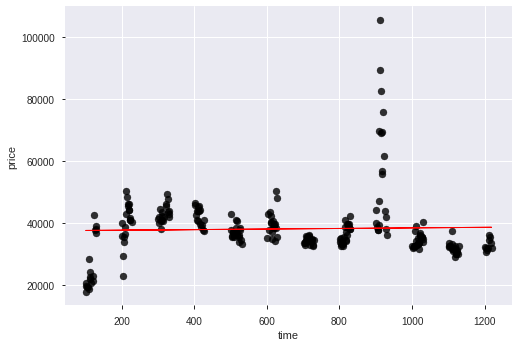

In [75]:
plt.xlabel('time')
plt.ylabel('price')
# 画训练集的散点图
plt.scatter(X_train,y_train,alpha=0.8,color='black')
# 画模型，二维空间的直线
plt.plot(X_train,regr.coef_ * X_train + regr.intercept_,color='red',linewidth=1)
plt.show()

In [ ]:
MLP=neural_network.MLPRegressor()
svm=SVR(kernel='linear')
tree=ExtraTreeRegressor()
bagging=BaggingRegressor()
GDBT=GradientBoostingRegressor()
RF=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
LR=LinearRegression()
PLS=PLSRegression(scale=True)#最小偏二乘回归，保留2个主成分
T = np.array([6, 7, 8, 9, 10])
xnew = np.linspace(T.min(),T.max(),300)

ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

MLP.fit(X_train,Y_train)
y_pred=MLP.predict(X_test)
power_smooth = spline(T,y_pred,xnew)
plt.plot(xnew,power_smooth,'r-',label="BP神经网络")
plt.plot(T,y_pred,"rp")

svm.fit(X_train,Y_train)
y_pred1=svm.predict(X_test)
power_smooth = spline(T,y_pred1,xnew)
plt.plot(xnew,power_smooth,'y-',label="高斯核支持向量机")
plt.plot(T,y_pred1,"yD")

tree.fit(X_train,Y_train)
y_pred2=tree.predict(X_test)
power_smooth = spline(T,y_pred2,xnew)
plt.plot(xnew,power_smooth,'b-',label="决策树")
plt.plot(T,y_pred2,"b+")

bagging.fit(X_train,Y_train)
y_pred3=bagging.predict(X_test)
power_smooth = spline(T,y_pred3,xnew)
plt.plot(xnew,power_smooth,'c-',label="bagging")
plt.plot(T,y_pred3,"cH")

GDBT.fit(X_train,Y_train)
y_pred4=GDBT.predict(X_test)
power_smooth = spline(T,y_pred4,xnew)
plt.plot(xnew,power_smooth,'m-',label="GDBT")
plt.plot(T,y_pred4,"mH")

RF.fit(X_train,Y_train)
y_pred5=RF.predict(X_test)
power_smooth = spline(T,y_pred5,xnew)
plt.plot(xnew,power_smooth,'c-',label="随机森林")
plt.plot(T,y_pred5,"cH")

AdaBoost.fit(X_train,Y_train)
y_pred6=AdaBoost.predict(X_test)
power_smooth = spline(T,y_pred6,xnew)
plt.plot(xnew,power_smooth,'c-',label="AdaBoost")
plt.plot(T,y_pred6,"cH")

PLS.fit(X_train,Y_train)
y_pred_n=PLS.predict(X_test)
power_smooth = spline(T,y_pred_n,xnew)
plt.plot(xnew,power_smooth/100,'m-',label="最小偏二乘回归")
plt.plot(T,y_pred_n/100,"mH")

LR.fit(X_train,Y_train)
y_pred7=LR.predict(X_test)
power_smooth = spline(T,y_pred7,xnew)
plt.plot(xnew,power_smooth,'b-',label="线性回归")
plt.plot(T,y_pred7,"b*")

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic1 = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic1 = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic1, Y_train)
y_pred8=regressor_quadratic.predict(X_test_quadratic1)
power_smooth = spline(T,y_pred8,xnew)
plt.plot(xnew,power_smooth,'g-',label="2次曲线拟合回归")
plt.plot(T,y_pred8,"gh")

quadratic_featurizer = PolynomialFeatures(degree=3)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, Y_train)
y_pred9=regressor_quadratic.predict(X_test_quadratic)
power_smooth = spline(T,y_pred9,xnew)
plt.plot(xnew,power_smooth,'g-',label="3次曲线拟合回归")
plt.plot(T,y_pred9,"gh")

power_smooth = spline(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,xnew)
plt.plot(xnew,power_smooth,'k--',label="平均值")
plt.plot(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,"gh")

plt.title("预测")
plt.plot(T,Y_test,'k.',label="真实值")
# plt.legend(loc="best",bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.legend(loc="best",fancybox=True,shadow=True)
plt.savefig("f:/desktop/预测.jpeg",dpi=1000)#一定要放在plt.show()的前面，不然会一面空白
plt.show()
print('R2' ,r2_score(Y_test,y_pred1))
print('均方误差（MSE） ' ,mean_squared_error(Y_test,y_pred1))
print('可解释性方差 ' ,explained_variance_score(Y_test,y_pred1))